CLASSIFICATION WITH K-NEAREST NEIGHBORS AND THE DIGIS DATASET

In [154]:
from sklearn.datasets import load_digits

In [155]:
digits = load_digits()

In [156]:

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [157]:
#LETS DISPLAY THE TARGET VALUE OF EVERY 100TH SAMPLE, expecting at least 17 values
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [158]:
digits.data.shape

(1797, 64)

In [159]:

digits.target.shape

(1797,)

In [160]:
#lets show a two dimensional array representing the sample image at index 13
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [161]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [162]:
#visualizing the data 
import matplotlib.pyplot as plt

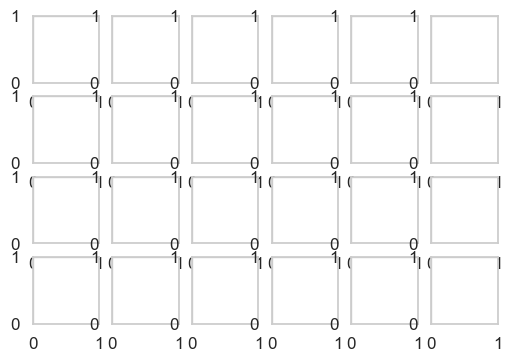

In [163]:
figure, axes = plt.subplots(nrows= 4, ncols= 6, figsize=(6,4))
#subplot returns the axes objects in two dimensional numpy array

In [164]:
#displaying each image and removing the axes labels
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # removes x-axis tick marks
    axes.set_yticks([]) # removes y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [165]:
#training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)


In [166]:
X_train.shape

(1347, 64)

In [167]:
X_test.shape

(450, 64)

In [168]:
#CREATING THE MODEL
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [169]:
knn.fit(X = X_train, y = y_train)

KNeighborsClassifier()

In [170]:
#predicting digit classes 
#now that we've loaded the data into knn estimator lets use it with the test samples to make predictions
predicted = knn.predict(X=X_test)
expected = y_test


In [171]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [172]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [173]:
#in our first 20 values, only our values at index 18 did not match
#lets use a list comprehension to find all wrong predictions fopr the entire test
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [174]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [175]:
#in this example we see that our model wrongly predicted 10 values out of 450
#giving it  high prediction rate of 97.78

In [176]:
#we will evaluate the knn classification estimator accuracy
#execute multiple estimators and compare their results so as to choose the best one 

In [177]:
#metrics for model accuracy
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


In [178]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = expected, y_pred= predicted)

In [179]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [180]:
#classification report
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]


In [181]:
names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [182]:
print(classification_report(expected, predicted, 
                            target_names= names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [183]:
#visualizing the confusion matrix
import pandas as pd
confusion_df = pd.DataFrame(confusion, index=range(10),
                            columns = range(10))

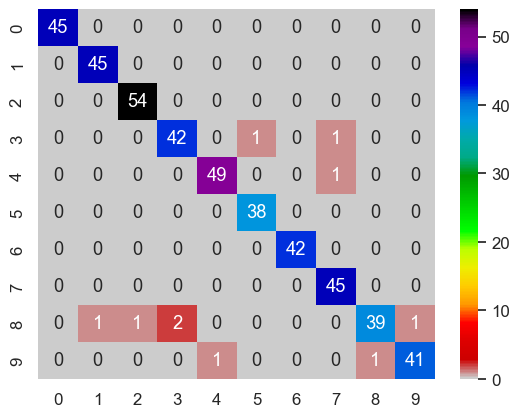

In [184]:
import seaborn as sns
axes = sns.heatmap(confusion_df, annot = True,
                   cmap='nipy_spectral_r')

In [185]:
#K FOLD CROSS EXAMINATION
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state = 11, shuffle=True)

In [186]:
#USING THE KFOLD OBJECT WITH CROSS_VAL_SCORE 
from sklearn.model_selection import cross_val_score

scores= cross_val_score(estimator=knn, X=digits.data,
                        y=digits.target, cv=kfold)

In [187]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [188]:
scores[8]

1.0

In [189]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [190]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%


In [191]:
#on average the model was 98.72 accurate even better than the 97.78 initially generated

In [192]:
#running multiple models to find the best ones
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [193]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC':SVC(gamma='scale'),
    'Gaussiannb': GaussianNB()}

In [194]:
for estimator_name, estimator_object in estimators.items():
    kfold= KFold(n_splits=10, random_state=11, shuffle= True)
    scores = cross_val_score(estimator = estimator_object,
        X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
            f'mean accuracy: {scores.mean():.2%}; ' +
            f'Accuracy standard deviation: {scores.std():.2%}')

KNeighborsClassifier: mean accuracy: 98.72%; Accuracy standard deviation: 0.75%
                 SVC: mean accuracy: 98.72%; Accuracy standard deviation: 0.79%
          Gaussiannb: mean accuracy: 84.48%; Accuracy standard deviation: 3.47%


In [195]:
#HYPERPARAMETER TUNING
"""TRYING TO DECIDE WHAT VALUE OF K AS A PARAMETER OF A MODEL GIVES US THE BEST ACCURRACY,
NOTE: WE ALWAYS WANT TO USE AN ODD VALUE FOR K TO AVOID TIES"""
for k in range(1, 20, 2):
    kfold = KFold(n_splits = 10, random_state=11, shuffle = True)
    knn= KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score( estimator = knn, 
                            X = digits.data, y = digits.target, cv = kfold)
    print(f'k={k:<2}; mean accuracy = {scores.mean():.2%}; ' +
          f' standard deviation = {scores.std():.2%}')


k=1 ; mean accuracy = 98.83%;  standard deviation = 0.58%
k=3 ; mean accuracy = 98.83%;  standard deviation = 0.72%
k=5 ; mean accuracy = 98.72%;  standard deviation = 0.75%
k=7 ; mean accuracy = 98.44%;  standard deviation = 0.96%
k=9 ; mean accuracy = 98.39%;  standard deviation = 0.80%
k=11; mean accuracy = 98.39%;  standard deviation = 0.80%
k=13; mean accuracy = 97.89%;  standard deviation = 0.89%
k=15; mean accuracy = 97.89%;  standard deviation = 1.02%
k=17; mean accuracy = 97.50%;  standard deviation = 1.00%
k=19; mean accuracy = 97.66%;  standard deviation = 0.96%
